In [ ]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix,classification_report,log_loss,precision_score,recall_score

In [10]:
# Reading data
data=pd.read_csv('ChurnData.csv')
data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [11]:
# Converting churn column from float to int
data['churn']=data['churn'].astype('int')
data.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [12]:
# SHAPE OF DIMENSION
data.shape

(200, 28)

In [13]:
# DATAFRAME TO ARRAY
x=np.asanyarray(data[['tenure','age','ed']])
y=np.asanyarray(data['churn'])

In [14]:
# # preprocessing
# scaler=preprocessing.MinMaxScaler()
# x=scaler.fit(x)

In [15]:
# TRAIN - TEST - SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

In [16]:
# TRAINING THE MODEL
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# ACTUAL 
predict_actual=lr.predict(x_test)  
accuracy_actual=lr.score(x_test,y_test)
classification_report_actual=classification_report(y_test,predict_actual)
print(predict_actual,accuracy_actual,classification_report_actual,sep='\n')

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
0.75
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        38
           1       0.89      0.36      0.52        22

    accuracy                           0.75        60
   macro avg       0.81      0.67      0.67        60
weighted avg       0.79      0.75      0.72        60



[-0.1652293650905401, -1.3855175544992746, -1.8175637158828177, 0.3053844934546842, -0.3620243417653427, -1.6695237325438823, -1.5292662110152855, -1.8601608103769536, -1.5971547968559148, -3.060491036147829, -0.3276606615964298, -1.8184898002101715, -4.615441292760215, -3.21641519449136, -0.007840860074615263, -0.2625261494402745, -0.7085855779419451, -3.7959630768687993, -1.2419579210076774, 0.5945207728194132, -1.0699161733343279, -1.3575737026625632, -0.2795698230974458, 0.4771643116375631, -1.8530281000393978, -2.336743544739496, 0.5825198906522066, -2.210140275074913, -0.04237915990384178, -1.41621548002046, -2.631097235254503, -0.15047440923885935, 0.0069140957770655875, -2.439446763263922, -0.7872870321319575, -0.9644732844895277, -0.0798461530778557, 0.19078210595730793, -0.30228186041977934, 0.15459043643127446, -1.4372885510100866, -0.337009183273419, -1.0858591430038325, -2.400966375932397, -3.6333427573384953, -1.21750520415838, 0.7356026654811069, -1.4815246118369285, -0.

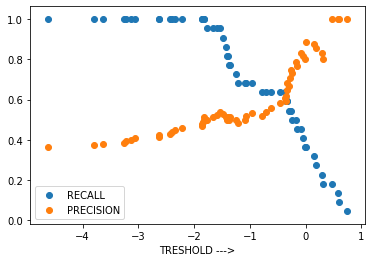

In [18]:
# LET MY PROJECT IS RECALL-ORIENTED.
# AIM HERE TO SELECT BEST VALUE FOR DECISION_TRESHOLD TO  GET HIGH RECALL.
# SO TO SELECT GOOD DECISION_TEESHOLD WE PLOT PRECISION-RECALL-VARIOUS_DECISION_TEESHOLD CURVE.
decision_function=lr.decision_function(x_test)
predict_desired=[]
lst_precision=[]
lst_recall=[]
lst_decision_treshold=list(decision_function)
for i in range(len(decision_function)):
    decision_treshold=decision_function[i]
    for j in range(len(decision_function)):
        if decision_function[j]<decision_treshold:
            predict_desired.append(0)
        else:
            predict_desired.append(1)
    recall=recall_score(y_test,predict_desired)
    precision=precision_score(y_test,predict_desired)
    lst_recall.append(recall)
    lst_precision.append(precision)
    predict_desired=[]
        
# PLOT THE CURVE
plt.scatter(lst_decision_treshold,lst_recall,label='RECALL')
plt.scatter(lst_decision_treshold,lst_precision,label='PRECISION')
plt.legend()
plt.xlabel('TRESHOLD --->')

print(lst_decision_treshold)

In [19]:
# PLOTING PRECISION-RECALL CURVE USING SKLEARN MODULE
from sklearn.metrics import precision_recall_curve
precision,recall,treshold=precision_recall_curve(y_test,decision_function)

Text(0.5, 1.0, 'Precision-Recall Curve')

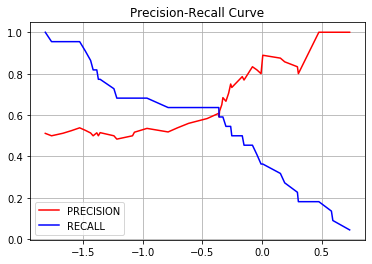

In [11]:
# PLOT THE GRAPH
plt.plot(treshold,precision[:-1],c='r',label='PRECISION')
plt.plot(treshold,recall[:-1],c='b',label='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In [12]:
# Tresholds obtained from sklearn
print(treshold)
print(treshold.shape)


[-1.81756372 -1.76516715 -1.66952373 -1.5971548  -1.52926621 -1.48152461
 -1.43728855 -1.41621548 -1.38551755 -1.37241597 -1.3575737  -1.24195792
 -1.2175052  -1.08585914 -1.06991617 -0.96447328 -0.78728703 -0.70858558
 -0.61550721 -0.45949575 -0.36202434 -0.35972122 -0.35560451 -0.33700918
 -0.32766066 -0.30228186 -0.27956982 -0.26252615 -0.25309032 -0.16522937
 -0.15047441 -0.07984615 -0.04237916 -0.00784086  0.0069141   0.15459044
  0.19078211  0.2973257   0.30538449  0.47716431  0.58251989  0.59452077
  0.73560267]
(43,)


In [13]:
# Tresholds obtained from desi code
print(lst_decision_treshold)
print(len(lst_decision_treshold))

[-0.1652293650905401, -1.3855175544992746, -1.8175637158828177, 0.3053844934546842, -0.3620243417653427, -1.6695237325438823, -1.5292662110152855, -1.8601608103769536, -1.5971547968559148, -3.060491036147829, -0.3276606615964298, -1.8184898002101715, -4.615441292760215, -3.21641519449136, -0.007840860074615263, -0.2625261494402745, -0.7085855779419451, -3.7959630768687993, -1.2419579210076774, 0.5945207728194132, -1.0699161733343279, -1.3575737026625632, -0.2795698230974458, 0.4771643116375631, -1.8530281000393978, -2.336743544739496, 0.5825198906522066, -2.210140275074913, -0.04237915990384178, -1.41621548002046, -2.631097235254503, -0.15047440923885935, 0.0069140957770655875, -2.439446763263922, -0.7872870321319575, -0.9644732844895277, -0.0798461530778557, 0.19078210595730793, -0.30228186041977934, 0.15459043643127446, -1.4372885510100866, -0.337009183273419, -1.0858591430038325, -2.400966375932397, -3.6333427573384953, -1.21750520415838, 0.7356026654811069, -1.4815246118369285, -0.

In [17]:
# PRECISION LIST FROM DESI CODE
print(len(lst_precision))
print(lst_precision)

60
[0.7857142857142857, 0.5142857142857142, 0.5116279069767442, 0.8, 0.6086956521739131, 0.5121951219512195, 0.5384615384615384, 0.46808510638297873, 0.525, 0.4074074074074074, 0.6842105263157895, 0.5, 0.36666666666666664, 0.39285714285714285, 0.8, 0.75, 0.5384615384615384, 0.3728813559322034, 0.5, 1.0, 0.5172413793103449, 0.5151515151515151, 0.7058823529411765, 1.0, 0.4782608695652174, 0.4489795918367347, 1.0, 0.4583333333333333, 0.8181818181818182, 0.5, 0.41509433962264153, 0.7692307692307693, 0.8888888888888888, 0.43137254901960786, 0.5185185185185185, 0.5357142857142857, 0.8333333333333334, 0.8571428571428571, 0.6666666666666666, 0.875, 0.5135135135135135, 0.65, 0.5, 0.44, 0.3793103448275862, 0.4838709677419355, 1.0, 0.5263157894736842, 0.6190476190476191, 0.56, 0.4888888888888889, 0.38596491228070173, 0.8333333333333334, 0.4, 0.5909090909090909, 0.5833333333333334, 0.5, 0.7333333333333333, 0.5, 0.4230769230769231]


In [19]:
# PRECISION LIST FROM SKLEARN PRODUCED
print(precision.shape)
print(precision)

(44,)
[0.51162791 0.5        0.51219512 0.525      0.53846154 0.52631579
 0.51351351 0.5        0.51428571 0.5        0.51515152 0.5
 0.48387097 0.5        0.51724138 0.53571429 0.51851852 0.53846154
 0.56       0.58333333 0.60869565 0.59090909 0.61904762 0.65
 0.68421053 0.66666667 0.70588235 0.75       0.73333333 0.78571429
 0.76923077 0.83333333 0.81818182 0.8        0.88888889 0.875
 0.85714286 0.83333333 0.8        1.         1.         1.
 1.         1.        ]


In [21]:
# RECALL FROM DESI CODE
print(len(lst_recall))
print(lst_recall)

60
[0.5, 0.8181818181818182, 1.0, 0.18181818181818182, 0.6363636363636364, 0.9545454545454546, 0.9545454545454546, 1.0, 0.9545454545454546, 1.0, 0.5909090909090909, 1.0, 1.0, 1.0, 0.36363636363636365, 0.5454545454545454, 0.6363636363636364, 1.0, 0.7272727272727273, 0.09090909090909091, 0.6818181818181818, 0.7727272727272727, 0.5454545454545454, 0.18181818181818182, 1.0, 1.0, 0.13636363636363635, 1.0, 0.4090909090909091, 0.8181818181818182, 1.0, 0.45454545454545453, 0.36363636363636365, 1.0, 0.6363636363636364, 0.6818181818181818, 0.45454545454545453, 0.2727272727272727, 0.5454545454545454, 0.3181818181818182, 0.8636363636363636, 0.5909090909090909, 0.6818181818181818, 1.0, 1.0, 0.6818181818181818, 0.045454545454545456, 0.9090909090909091, 0.5909090909090909, 0.6363636363636364, 1.0, 1.0, 0.22727272727272727, 1.0, 0.5909090909090909, 0.6363636363636364, 0.7727272727272727, 0.5, 0.9545454545454546, 1.0]


In [22]:
# RECALL FROM SKLEARN PRODUCED
print(recall.shape)
print(recall)

(44,)
[1.         0.95454545 0.95454545 0.95454545 0.95454545 0.90909091
 0.86363636 0.81818182 0.81818182 0.77272727 0.77272727 0.72727273
 0.68181818 0.68181818 0.68181818 0.68181818 0.63636364 0.63636364
 0.63636364 0.63636364 0.63636364 0.59090909 0.59090909 0.59090909
 0.59090909 0.54545455 0.54545455 0.54545455 0.5        0.5
 0.45454545 0.45454545 0.40909091 0.36363636 0.36363636 0.31818182
 0.27272727 0.22727273 0.18181818 0.18181818 0.13636364 0.09090909
 0.04545455 0.        ]


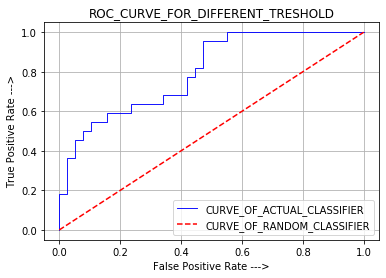

In [51]:
# FROM SKLEARN IMPORT ROC_CURVE
from sklearn.metrics import roc_curve
fpr,tpr,treshold_roc=roc_curve(y_test,decision_function)

# PLOT THE GRAPH
plt.plot(fpr,tpr,linewidth=0.9,c='b',label='CURVE_OF_ACTUAL_CLASSIFIER')
plt.xlabel('False Positive Rate --->')
plt.ylabel('True Positive Rate --->')
plt.title('ROC_CURVE_FOR_DIFFERENT_TRESHOLD')
plt.plot([0,1],[0,1],'r--',label='CURVE_OF_RANDOM_CLASSIFIER')
plt.grid()
plt.legend()

In [50]:
# AREA UNDER ROC CURVE
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,decision_function)
print(score)

0.8002392344497608
